<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Evaluation-of-the-market-value-of-the-car" data-toc-modified-id="Evaluation-of-the-market-value-of-the-car-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Evaluation of the market value of the car</a></span><ul class="toc-item"><li><span><a href="#Features-descriprion" data-toc-modified-id="Features-descriprion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Features descriprion</a></span></li></ul></li><li><span><a href="#1.-Data-preprocessing" data-toc-modified-id="1.-Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1. Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Viewing-data" data-toc-modified-id="Viewing-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Viewing data</a></span></li><li><span><a href="#Preprocessing-data-for-work" data-toc-modified-id="Preprocessing-data-for-work-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preprocessing data for work</a></span><ul class="toc-item"><li><span><a href="#Handling-anomalous-values" data-toc-modified-id="Handling-anomalous-values-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Handling anomalous values</a></span></li><li><span><a href="#Processing-NaN's" data-toc-modified-id="Processing-NaN's-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Processing NaN's</a></span></li></ul></li></ul></li><li><span><a href="#Models-training" data-toc-modified-id="Models-training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models training</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-normalization" data-toc-modified-id="Data-normalization-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Data normalization</a></span></li></ul></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CatBoostRegressor</a></span><ul class="toc-item"><li><span><a href="#CatBoostRegressor---different-params" data-toc-modified-id="CatBoostRegressor---different-params-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>CatBoostRegressor - different params</a></span><ul class="toc-item"><li><span><a href="#Tree-depth" data-toc-modified-id="Tree-depth-3.1.1.1"><span class="toc-item-num">3.1.1.1&nbsp;&nbsp;</span>Tree depth</a></span></li><li><span><a href="#Learning-rate" data-toc-modified-id="Learning-rate-3.1.1.2"><span class="toc-item-num">3.1.1.2&nbsp;&nbsp;</span>Learning rate</a></span></li></ul></li></ul></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#DummyRegressor" data-toc-modified-id="DummyRegressor-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>DummyRegressor</a></span></li></ul></li><li><span><a href="#Comparing-models" data-toc-modified-id="Comparing-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparing models</a></span><ul class="toc-item"><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></li></ul></div>

# Evaluation of the market value of the car

There are historical data: technical characteristics, configuration and prices of cars. You need to build a model to determine the cost.

Important:
- the quality of the prediction;
- prediction speed;
- training time.

## Features descriprion

**Features**
- DateCrawled - date of downloading the questionnaire from the database
- VehicleType - type of car body
- RegistrationYear - year of vehicle registration
- Gearbox - type of gearbox
- Power - power (l. From.)
- Model - car model
- Kilometer - mileage (km)
- RegistrationMonth - month of vehicle registration
- FuelType - fuel type
- Brand - car brand
- NotRepaired - was the car being repaired or not
- DateCreated - date of creation of the profile
- NumberOfPictures - number of car photos
- PostalCode - postal code of the profile owner (user)
- LastSeen - date of last user activity

**Target feature**
  
- Price - price (euro)

# 1. Data preprocessing

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
import lightgbm as lgb


from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import sqrt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from IPython.display import display


In [2]:
data = pd.read_csv('autos.csv')

## Viewing data

In [3]:
def info(x):
    return  x.info(), display(x.head()), display(x.describe().astype(int))

In [4]:
info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369,354369,354369,354369,354369,354369,354369
mean,4416,2004,110,128211,5,0,50508
std,4514,90,189,37905,3,0,25783
min,0,1000,0,5000,0,0,1067
25%,1050,1999,69,125000,3,0,30165
50%,2700,2003,105,150000,6,0,49413
75%,6400,2008,143,150000,9,0,71083
max,20000,9999,20000,150000,12,0,99998


(None, None, None)

## Preprocessing data for work

**Let's leave only those signs that affect the value of the car:**
- Price - price (euro)
- VehicleType - type of car body
- RegistrationYear - year of vehicle registration
- Gearbox - type of gearbox
- Power - power (l. From.)
- Model - car model
- Kilometer - mileage (km)
- FuelType - fuel type
- Brand - car brand
- NotRepaired - was the car being repaired or not

**Remove unnecessary ones:**
- DateCrawled - date of downloading the questionnaire from the database
- RegistrationMonth - month of vehicle registration
- NumberOfPictures - number of car photos
- LastSeen - date of last user activity
- DateCreated - date of creation of the profile
- PostalCode - postal code of the owner of the questionnaire * (could have been left if there was a link between the index and geography, but within the framework of this project we will not do this) *

**Checking duplicates**

In [5]:
print('Duplicates:', data.duplicated().sum())

Duplicates: 4


In [6]:
data = data.drop_duplicates().reset_index(drop=True)

**Deleting unnecessary features**

In [7]:
data = data[['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model', 
             'Kilometer', 'FuelType', 'Brand', 'NotRepaired']]

### Handling anomalous values

In [8]:
data.describe().astype(int)

,Price,RegistrationYear,Power,Kilometer
count,354365,354365,354365,354365
mean,4416,2004,110,128211
std,4514,90,189,37905
min,0,1000,0,5000
25%,1050,1999,69,125000
50%,2700,2003,105,150000
75%,6400,2008,143,150000
max,20000,9999,20000,150000


- Let's remove the anomalous values from the target feature.
- In the rest of the features, we will leave them so that our model is ready to work with outliers

In [9]:
data = data.loc[data['Price'] > 99].reset_index(drop=True)

In [10]:
data

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
341046,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no
341047,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
341048,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
341049,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


### Processing NaN's

In [11]:
print('Percentage of NaN in features:')
data.isna().sum().sort_values(ascending = False)/len(data)*100

Percentage of NaN in features:


NotRepaired         18.870198
VehicleType          9.562206
FuelType             8.312247
Model                4.994268
Gearbox              4.783449
Brand                0.000000
Kilometer            0.000000
Power                0.000000
RegistrationYear     0.000000
Price                0.000000
dtype: float64

**Options for working with NaN:**
- **Remove NaN** - there will be enough data for further analysis
- **Fill in gaps using ML model predictions or estimates** - VehicleType predictions are likely to be accurate, NotRepaided predictions may be inaccurate and affect the quality of our model

<AxesSubplot:title={'center':'Distribution of prices in the original data and after the removal of NaN'}>

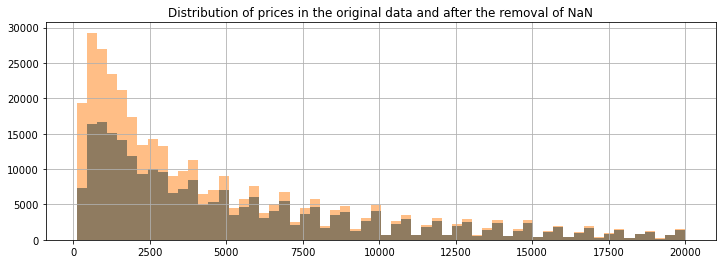

In [12]:
plt.title('Distribution of prices in the original data and after the removal of NaN')
data.dropna()['Price'].hist(bins=60, figsize=(10, 5))
data['Price'].hist(bins=60, alpha=0.5, figsize=(12, 4))

**Conclusion:** After removing all NaN, our target does not change, that is, removing NaN will not affect our forecast. It would be possible to fill in the gaps using the ML, but there would be less confidence in such data.

In [13]:
data = data.dropna().reset_index(drop=True)

# Models training

Unchanged features:

In [14]:
features = data.drop('Price', axis=1)
target = data['Price']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42)

### Data normalization

**Because. we will work with linear regression, we will encode categorical features using the One Hot Encoding technique**

In [15]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [16]:
data_train_ohe, data_test_ohe = train_test_split(data_ohe, test_size=0.25, random_state=42)

In [17]:
print(data_train_ohe.shape)
print(data_test_ohe.shape)

(181343, 305)
(60448, 305)


**Scaling features**

In [18]:
numeric = ['RegistrationYear', 'Power', 'Kilometer']

scaler = StandardScaler()
scaler.fit(data_train_ohe[numeric])

StandardScaler()

In [19]:
data_train_ohe[numeric] = scaler.transform(data_train_ohe[numeric])
data_test_ohe[numeric] = scaler.transform(data_test_ohe[numeric])

<ipython-input-19-70ddd49dd4b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_ohe[numeric] = scaler.transform(data_train_ohe[numeric])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-19-70ddd49dd4b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [20]:
print(data_train_ohe.shape)
print(data_test_ohe.shape)

(181343, 305)
(60448, 305)


Encoded and normalized features:

In [21]:
features_train_ohe = data_train_ohe.drop('Price', axis=1)
features_test_ohe = data_test_ohe.drop('Price', axis=1)
target_train_ohe = data_train_ohe['Price']
target_test_ohe = data_test_ohe['Price']

In [22]:
print(features_train_ohe.shape)
print(features_test_ohe.shape)
print(target_train_ohe.shape)
print(target_test_ohe.shape)

(181343, 304)
(60448, 304)
(181343,)
(60448,)


In [23]:
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

ohe_cat_features = data_train_ohe.drop(
    ['Price', 'RegistrationYear', 'Power', 'Kilometer'], axis=1).columns

## CatBoostRegressor

In [24]:
%%time

CBR = CatBoostRegressor(loss_function="RMSE", iterations=350)

CBR.fit(features_train, target_train, cat_features=cat_features, verbose=50)

Learning rate set to 0.218737
0:	learn: 4032.2370327	total: 266ms	remaining: 1m 32s
50:	learn: 1728.7141043	total: 5.89s	remaining: 34.5s
100:	learn: 1638.4292997	total: 12.3s	remaining: 30.3s
150:	learn: 1600.0357475	total: 18.3s	remaining: 24.1s
200:	learn: 1576.8531049	total: 24.3s	remaining: 18s
250:	learn: 1560.4849256	total: 30.8s	remaining: 12.2s
300:	learn: 1544.5385623	total: 37.5s	remaining: 6.1s
349:	learn: 1528.8384478	total: 44.7s	remaining: 0us
Wall time: 45.5 s


In [25]:
def cvs(model_name):
    print('Cross-validation RMSE: {:.0f}'.format(
        np.sqrt(abs(cross_val_score(
            model_name, features_train_ohe, target_train_ohe, cv=5, 
            scoring='neg_mean_squared_error'))).mean()))

In [26]:
cvs(CBR)

Learning rate set to 0.210219
0:	learn: 4063.8434708	total: 19.7ms	remaining: 6.88s
1:	learn: 3576.5274066	total: 38ms	remaining: 6.61s
2:	learn: 3205.0292475	total: 54.7ms	remaining: 6.33s
3:	learn: 2929.3256193	total: 71.1ms	remaining: 6.15s
4:	learn: 2715.9998165	total: 89.4ms	remaining: 6.17s
5:	learn: 2558.6067509	total: 106ms	remaining: 6.1s
6:	learn: 2438.4316877	total: 122ms	remaining: 6s
7:	learn: 2347.5482325	total: 139ms	remaining: 5.96s
8:	learn: 2277.2594065	total: 156ms	remaining: 5.9s
9:	learn: 2215.1439251	total: 174ms	remaining: 5.92s
10:	learn: 2163.4238212	total: 194ms	remaining: 5.97s
11:	learn: 2124.9776636	total: 216ms	remaining: 6.08s
12:	learn: 2087.2274708	total: 235ms	remaining: 6.09s
13:	learn: 2057.0006288	total: 257ms	remaining: 6.17s
14:	learn: 2031.1770319	total: 277ms	remaining: 6.17s
15:	learn: 2012.1346213	total: 297ms	remaining: 6.19s
16:	learn: 1994.5391756	total: 316ms	remaining: 6.18s
17:	learn: 1977.0542661	total: 340ms	remaining: 6.27s
18:	learn:

151:	learn: 1616.7834969	total: 2.99s	remaining: 3.9s
152:	learn: 1615.6416489	total: 3.02s	remaining: 3.89s
153:	learn: 1614.5402755	total: 3.05s	remaining: 3.88s
154:	learn: 1614.0207758	total: 3.07s	remaining: 3.86s
155:	learn: 1613.1463134	total: 3.09s	remaining: 3.84s
156:	learn: 1611.9110166	total: 3.11s	remaining: 3.82s
157:	learn: 1611.3148850	total: 3.12s	remaining: 3.79s
158:	learn: 1610.1487475	total: 3.14s	remaining: 3.77s
159:	learn: 1609.5582641	total: 3.16s	remaining: 3.75s
160:	learn: 1608.5404230	total: 3.17s	remaining: 3.73s
161:	learn: 1608.0038841	total: 3.19s	remaining: 3.71s
162:	learn: 1607.3750377	total: 3.21s	remaining: 3.68s
163:	learn: 1606.6365571	total: 3.23s	remaining: 3.66s
164:	learn: 1605.6263391	total: 3.24s	remaining: 3.64s
165:	learn: 1604.7644068	total: 3.26s	remaining: 3.61s
166:	learn: 1604.1161880	total: 3.28s	remaining: 3.59s
167:	learn: 1602.9601185	total: 3.29s	remaining: 3.57s
168:	learn: 1602.5333154	total: 3.31s	remaining: 3.55s
169:	learn:

307:	learn: 1533.0273619	total: 5.99s	remaining: 816ms
308:	learn: 1532.7585705	total: 6s	remaining: 797ms
309:	learn: 1532.3103509	total: 6.02s	remaining: 777ms
310:	learn: 1532.2264116	total: 6.04s	remaining: 758ms
311:	learn: 1531.7576713	total: 6.06s	remaining: 738ms
312:	learn: 1531.3453639	total: 6.08s	remaining: 719ms
313:	learn: 1530.8382937	total: 6.1s	remaining: 700ms
314:	learn: 1530.3961138	total: 6.13s	remaining: 681ms
315:	learn: 1530.1713699	total: 6.14s	remaining: 661ms
316:	learn: 1529.6073551	total: 6.16s	remaining: 641ms
317:	learn: 1529.0147130	total: 6.18s	remaining: 622ms
318:	learn: 1528.7684928	total: 6.2s	remaining: 602ms
319:	learn: 1528.1272102	total: 6.22s	remaining: 583ms
320:	learn: 1527.7492814	total: 6.24s	remaining: 563ms
321:	learn: 1527.3002935	total: 6.25s	remaining: 544ms
322:	learn: 1527.0294138	total: 6.27s	remaining: 524ms
323:	learn: 1526.9030204	total: 6.29s	remaining: 505ms
324:	learn: 1526.5260420	total: 6.31s	remaining: 486ms
325:	learn: 152

110:	learn: 1653.3229385	total: 2s	remaining: 4.31s
111:	learn: 1652.4741534	total: 2.02s	remaining: 4.29s
112:	learn: 1650.8169745	total: 2.04s	remaining: 4.27s
113:	learn: 1649.7574689	total: 2.06s	remaining: 4.26s
114:	learn: 1648.9508575	total: 2.08s	remaining: 4.24s
115:	learn: 1648.0530035	total: 2.09s	remaining: 4.22s
116:	learn: 1646.5241454	total: 2.11s	remaining: 4.2s
117:	learn: 1645.5014693	total: 2.13s	remaining: 4.18s
118:	learn: 1644.8342769	total: 2.14s	remaining: 4.16s
119:	learn: 1643.8983767	total: 2.16s	remaining: 4.14s
120:	learn: 1643.4481628	total: 2.17s	remaining: 4.12s
121:	learn: 1642.7968208	total: 2.19s	remaining: 4.09s
122:	learn: 1642.1526961	total: 2.21s	remaining: 4.08s
123:	learn: 1641.4039027	total: 2.23s	remaining: 4.06s
124:	learn: 1640.1865262	total: 2.24s	remaining: 4.04s
125:	learn: 1639.5548555	total: 2.26s	remaining: 4.01s
126:	learn: 1638.3719163	total: 2.27s	remaining: 3.99s
127:	learn: 1637.2582540	total: 2.29s	remaining: 3.97s
128:	learn: 16

269:	learn: 1547.2841348	total: 4.99s	remaining: 1.48s
270:	learn: 1547.0580762	total: 5.01s	remaining: 1.46s
271:	learn: 1546.3264383	total: 5.03s	remaining: 1.44s
272:	learn: 1546.0593962	total: 5.05s	remaining: 1.43s
273:	learn: 1545.6291967	total: 5.07s	remaining: 1.41s
274:	learn: 1545.4849787	total: 5.09s	remaining: 1.39s
275:	learn: 1545.1700052	total: 5.11s	remaining: 1.37s
276:	learn: 1544.7111814	total: 5.13s	remaining: 1.35s
277:	learn: 1544.2350201	total: 5.15s	remaining: 1.33s
278:	learn: 1543.9003058	total: 5.16s	remaining: 1.31s
279:	learn: 1543.6094286	total: 5.18s	remaining: 1.29s
280:	learn: 1543.3406034	total: 5.2s	remaining: 1.27s
281:	learn: 1542.9621432	total: 5.21s	remaining: 1.26s
282:	learn: 1542.5531571	total: 5.23s	remaining: 1.24s
283:	learn: 1542.2366947	total: 5.24s	remaining: 1.22s
284:	learn: 1541.8808987	total: 5.26s	remaining: 1.2s
285:	learn: 1541.6801530	total: 5.28s	remaining: 1.18s
286:	learn: 1541.4469114	total: 5.29s	remaining: 1.16s
287:	learn: 

70:	learn: 1720.2257112	total: 1.26s	remaining: 4.96s
71:	learn: 1717.9671356	total: 1.28s	remaining: 4.95s
72:	learn: 1716.3075476	total: 1.31s	remaining: 4.96s
73:	learn: 1714.1623681	total: 1.33s	remaining: 4.95s
74:	learn: 1712.7368777	total: 1.35s	remaining: 4.95s
75:	learn: 1709.5325108	total: 1.38s	remaining: 4.96s
76:	learn: 1707.6259530	total: 1.39s	remaining: 4.94s
77:	learn: 1705.4044220	total: 1.42s	remaining: 4.97s
78:	learn: 1704.2926356	total: 1.45s	remaining: 4.96s
79:	learn: 1702.5019183	total: 1.46s	remaining: 4.94s
80:	learn: 1699.5613271	total: 1.49s	remaining: 4.93s
81:	learn: 1697.7179184	total: 1.51s	remaining: 4.92s
82:	learn: 1696.0462311	total: 1.53s	remaining: 4.93s
83:	learn: 1693.7459307	total: 1.56s	remaining: 4.93s
84:	learn: 1692.2376341	total: 1.58s	remaining: 4.92s
85:	learn: 1690.5697129	total: 1.6s	remaining: 4.92s
86:	learn: 1688.7712010	total: 1.62s	remaining: 4.9s
87:	learn: 1687.8264315	total: 1.65s	remaining: 4.9s
88:	learn: 1685.4065003	total: 

227:	learn: 1562.3160756	total: 4.48s	remaining: 2.4s
228:	learn: 1562.0005482	total: 4.5s	remaining: 2.38s
229:	learn: 1561.6395755	total: 4.52s	remaining: 2.36s
230:	learn: 1561.3351843	total: 4.54s	remaining: 2.34s
231:	learn: 1560.8994924	total: 4.57s	remaining: 2.32s
232:	learn: 1560.3276849	total: 4.58s	remaining: 2.3s
233:	learn: 1559.9456919	total: 4.61s	remaining: 2.29s
234:	learn: 1559.2876642	total: 4.63s	remaining: 2.27s
235:	learn: 1558.6294413	total: 4.66s	remaining: 2.25s
236:	learn: 1558.2209571	total: 4.68s	remaining: 2.23s
237:	learn: 1557.8143394	total: 4.7s	remaining: 2.21s
238:	learn: 1557.0110596	total: 4.72s	remaining: 2.19s
239:	learn: 1556.6682077	total: 4.74s	remaining: 2.17s
240:	learn: 1556.1767077	total: 4.76s	remaining: 2.15s
241:	learn: 1555.8744572	total: 4.78s	remaining: 2.13s
242:	learn: 1555.3990115	total: 4.81s	remaining: 2.12s
243:	learn: 1555.0957950	total: 4.84s	remaining: 2.1s
244:	learn: 1554.6360125	total: 4.86s	remaining: 2.08s
245:	learn: 155

28:	learn: 1868.7500753	total: 518ms	remaining: 5.73s
29:	learn: 1861.0640592	total: 539ms	remaining: 5.75s
30:	learn: 1855.8772040	total: 555ms	remaining: 5.71s
31:	learn: 1850.0739473	total: 576ms	remaining: 5.72s
32:	learn: 1844.5454492	total: 595ms	remaining: 5.71s
33:	learn: 1840.6830385	total: 612ms	remaining: 5.68s
34:	learn: 1834.6400088	total: 628ms	remaining: 5.66s
35:	learn: 1828.2937129	total: 648ms	remaining: 5.65s
36:	learn: 1823.5379313	total: 668ms	remaining: 5.65s
37:	learn: 1820.0091288	total: 686ms	remaining: 5.63s
38:	learn: 1816.0711489	total: 703ms	remaining: 5.61s
39:	learn: 1813.3384349	total: 720ms	remaining: 5.58s
40:	learn: 1810.1431134	total: 739ms	remaining: 5.57s
41:	learn: 1807.2646099	total: 758ms	remaining: 5.56s
42:	learn: 1801.4432323	total: 780ms	remaining: 5.57s
43:	learn: 1797.3274838	total: 800ms	remaining: 5.57s
44:	learn: 1794.7988745	total: 820ms	remaining: 5.56s
45:	learn: 1790.3527179	total: 840ms	remaining: 5.55s
46:	learn: 1787.8900876	tota

187:	learn: 1597.8900581	total: 3.55s	remaining: 3.06s
188:	learn: 1596.9423899	total: 3.57s	remaining: 3.04s
189:	learn: 1596.3684938	total: 3.59s	remaining: 3.02s
190:	learn: 1595.9329600	total: 3.61s	remaining: 3s
191:	learn: 1594.9291466	total: 3.63s	remaining: 2.98s
192:	learn: 1594.3461928	total: 3.65s	remaining: 2.97s
193:	learn: 1593.6864162	total: 3.67s	remaining: 2.95s
194:	learn: 1593.0158815	total: 3.68s	remaining: 2.93s
195:	learn: 1592.7392930	total: 3.7s	remaining: 2.91s
196:	learn: 1592.3376806	total: 3.72s	remaining: 2.89s
197:	learn: 1591.7730336	total: 3.74s	remaining: 2.87s
198:	learn: 1591.0915816	total: 3.76s	remaining: 2.85s
199:	learn: 1590.2498793	total: 3.77s	remaining: 2.83s
200:	learn: 1589.3300111	total: 3.8s	remaining: 2.81s
201:	learn: 1588.7973390	total: 3.81s	remaining: 2.79s
202:	learn: 1588.0733400	total: 3.83s	remaining: 2.78s
203:	learn: 1587.4798222	total: 3.85s	remaining: 2.76s
204:	learn: 1586.8502171	total: 3.87s	remaining: 2.74s
205:	learn: 158

342:	learn: 1527.3924337	total: 6.34s	remaining: 129ms
343:	learn: 1526.9662204	total: 6.36s	remaining: 111ms
344:	learn: 1526.7455342	total: 6.37s	remaining: 92.4ms
345:	learn: 1526.6088930	total: 6.39s	remaining: 73.8ms
346:	learn: 1526.4037217	total: 6.4s	remaining: 55.4ms
347:	learn: 1526.1225680	total: 6.42s	remaining: 36.9ms
348:	learn: 1526.0079908	total: 6.43s	remaining: 18.4ms
349:	learn: 1525.5245024	total: 6.45s	remaining: 0us
Learning rate set to 0.210219
0:	learn: 4047.0165778	total: 18.5ms	remaining: 6.45s
1:	learn: 3554.3101777	total: 34.5ms	remaining: 6.01s
2:	learn: 3188.5410704	total: 51.2ms	remaining: 5.92s
3:	learn: 2920.3482679	total: 67.8ms	remaining: 5.86s
4:	learn: 2708.0493483	total: 83.9ms	remaining: 5.79s
5:	learn: 2545.8249244	total: 101ms	remaining: 5.78s
6:	learn: 2428.7757054	total: 117ms	remaining: 5.72s
7:	learn: 2341.8680141	total: 135ms	remaining: 5.77s
8:	learn: 2267.8381641	total: 152ms	remaining: 5.76s
9:	learn: 2196.7986454	total: 170ms	remaining:

146:	learn: 1622.2309803	total: 2.73s	remaining: 3.77s
147:	learn: 1621.4725389	total: 2.75s	remaining: 3.75s
148:	learn: 1620.2428168	total: 2.76s	remaining: 3.73s
149:	learn: 1619.6323470	total: 2.78s	remaining: 3.71s
150:	learn: 1618.9945414	total: 2.8s	remaining: 3.69s
151:	learn: 1617.7392766	total: 2.81s	remaining: 3.67s
152:	learn: 1616.5005865	total: 2.83s	remaining: 3.65s
153:	learn: 1615.8506236	total: 2.85s	remaining: 3.63s
154:	learn: 1615.2124907	total: 2.87s	remaining: 3.61s
155:	learn: 1614.5946986	total: 2.88s	remaining: 3.59s
156:	learn: 1614.0535307	total: 2.9s	remaining: 3.56s
157:	learn: 1613.5217857	total: 2.92s	remaining: 3.54s
158:	learn: 1613.3074628	total: 2.93s	remaining: 3.52s
159:	learn: 1612.2362023	total: 2.95s	remaining: 3.5s
160:	learn: 1611.5816270	total: 2.97s	remaining: 3.49s
161:	learn: 1611.2286644	total: 2.99s	remaining: 3.47s
162:	learn: 1610.3076931	total: 3s	remaining: 3.45s
163:	learn: 1609.7358026	total: 3.02s	remaining: 3.42s
164:	learn: 1608

296:	learn: 1538.2649153	total: 5.67s	remaining: 1.01s
297:	learn: 1537.8282120	total: 5.7s	remaining: 994ms
298:	learn: 1537.1856235	total: 5.72s	remaining: 976ms
299:	learn: 1536.9127193	total: 5.75s	remaining: 959ms
300:	learn: 1536.4991949	total: 5.78s	remaining: 940ms
301:	learn: 1536.1791047	total: 5.8s	remaining: 922ms
302:	learn: 1535.8343625	total: 5.82s	remaining: 903ms
303:	learn: 1535.2896979	total: 5.85s	remaining: 885ms
304:	learn: 1534.6654329	total: 5.87s	remaining: 866ms
305:	learn: 1534.2772760	total: 5.89s	remaining: 847ms
306:	learn: 1533.8751273	total: 5.91s	remaining: 828ms
307:	learn: 1533.4629065	total: 5.93s	remaining: 809ms
308:	learn: 1533.0550623	total: 5.95s	remaining: 789ms
309:	learn: 1532.6548492	total: 5.96s	remaining: 770ms
310:	learn: 1532.3217030	total: 5.98s	remaining: 750ms
311:	learn: 1531.8340269	total: 6s	remaining: 731ms
312:	learn: 1531.4162830	total: 6.02s	remaining: 711ms
313:	learn: 1531.1471096	total: 6.03s	remaining: 692ms
314:	learn: 153

In [27]:
%%time
CBR_predictions_test = CBR.predict(features_test)

Wall time: 252 ms


In [28]:
CBR_RMSE = sqrt(mean_squared_error(target_test, CBR_predictions_test))
print('RMSE CatBoostRegressor: {:.0f}'.format(CBR_RMSE))

RMSE CatBoostRegressor: 1586


### CatBoostRegressor - different params

#### Tree depth

In [29]:
%%time

CBR = CatBoostRegressor(loss_function="RMSE", iterations=350, depth=5)

CBR.fit(features_train, target_train, cat_features=cat_features, verbose=50)

Learning rate set to 0.218737
0:	learn: 4049.9067617	total: 96.2ms	remaining: 33.6s
50:	learn: 1774.8775179	total: 4.68s	remaining: 27.4s
100:	learn: 1687.5797305	total: 9.4s	remaining: 23.2s
150:	learn: 1643.0720196	total: 14s	remaining: 18.4s
200:	learn: 1617.5491118	total: 18.7s	remaining: 13.9s
250:	learn: 1600.6282013	total: 23.6s	remaining: 9.3s
300:	learn: 1585.7948863	total: 28.3s	remaining: 4.61s
349:	learn: 1574.6769274	total: 32.8s	remaining: 0us
Wall time: 33.6 s


In [30]:
cvs(CBR)

Learning rate set to 0.210219
0:	learn: 4084.6783096	total: 24.7ms	remaining: 8.63s
1:	learn: 3615.1154001	total: 46.9ms	remaining: 8.15s
2:	learn: 3263.5496521	total: 65.8ms	remaining: 7.62s
3:	learn: 2986.4145223	total: 86.2ms	remaining: 7.46s
4:	learn: 2781.8188137	total: 107ms	remaining: 7.35s
5:	learn: 2632.6201743	total: 123ms	remaining: 7.06s
6:	learn: 2515.7145292	total: 138ms	remaining: 6.78s
7:	learn: 2423.5652030	total: 154ms	remaining: 6.58s
8:	learn: 2352.4870386	total: 170ms	remaining: 6.42s
9:	learn: 2289.6279091	total: 184ms	remaining: 6.25s
10:	learn: 2243.0808818	total: 199ms	remaining: 6.13s
11:	learn: 2198.6690045	total: 214ms	remaining: 6.03s
12:	learn: 2155.2230152	total: 230ms	remaining: 5.95s
13:	learn: 2128.6305477	total: 245ms	remaining: 5.87s
14:	learn: 2104.6049746	total: 260ms	remaining: 5.8s
15:	learn: 2078.1547132	total: 278ms	remaining: 5.8s
16:	learn: 2060.9692796	total: 294ms	remaining: 5.76s
17:	learn: 2041.6622548	total: 311ms	remaining: 5.74s
18:	le

152:	learn: 1658.2200218	total: 2.51s	remaining: 3.23s
153:	learn: 1656.4219282	total: 2.53s	remaining: 3.22s
154:	learn: 1655.5296226	total: 2.54s	remaining: 3.2s
155:	learn: 1654.9045254	total: 2.56s	remaining: 3.18s
156:	learn: 1654.2997120	total: 2.57s	remaining: 3.16s
157:	learn: 1653.7182329	total: 2.58s	remaining: 3.14s
158:	learn: 1653.2826040	total: 2.6s	remaining: 3.12s
159:	learn: 1652.5592316	total: 2.62s	remaining: 3.1s
160:	learn: 1651.8265763	total: 2.63s	remaining: 3.09s
161:	learn: 1651.4039410	total: 2.64s	remaining: 3.07s
162:	learn: 1650.5902408	total: 2.66s	remaining: 3.05s
163:	learn: 1649.7596169	total: 2.67s	remaining: 3.03s
164:	learn: 1649.1998337	total: 2.69s	remaining: 3.02s
165:	learn: 1648.4329804	total: 2.7s	remaining: 3s
166:	learn: 1647.8572261	total: 2.72s	remaining: 2.98s
167:	learn: 1647.4953467	total: 2.73s	remaining: 2.96s
168:	learn: 1646.4870369	total: 2.75s	remaining: 2.94s
169:	learn: 1645.8162630	total: 2.76s	remaining: 2.92s
170:	learn: 1644.

306:	learn: 1574.4079635	total: 5.1s	remaining: 714ms
307:	learn: 1573.9271438	total: 5.11s	remaining: 697ms
308:	learn: 1573.2871082	total: 5.13s	remaining: 681ms
309:	learn: 1573.0394309	total: 5.15s	remaining: 664ms
310:	learn: 1572.8683399	total: 5.17s	remaining: 648ms
311:	learn: 1572.3997659	total: 5.18s	remaining: 631ms
312:	learn: 1572.1647324	total: 5.2s	remaining: 615ms
313:	learn: 1571.9685218	total: 5.21s	remaining: 598ms
314:	learn: 1571.4178574	total: 5.23s	remaining: 581ms
315:	learn: 1570.9810325	total: 5.25s	remaining: 565ms
316:	learn: 1570.7536188	total: 5.26s	remaining: 548ms
317:	learn: 1570.3577508	total: 5.28s	remaining: 532ms
318:	learn: 1570.0140140	total: 5.3s	remaining: 515ms
319:	learn: 1569.6782761	total: 5.32s	remaining: 498ms
320:	learn: 1569.3671572	total: 5.33s	remaining: 482ms
321:	learn: 1569.1028783	total: 5.35s	remaining: 465ms
322:	learn: 1568.9215986	total: 5.37s	remaining: 449ms
323:	learn: 1568.7667375	total: 5.38s	remaining: 432ms
324:	learn: 1

117:	learn: 1685.0104173	total: 2.19s	remaining: 4.32s
118:	learn: 1684.4068038	total: 2.21s	remaining: 4.29s
119:	learn: 1683.2589285	total: 2.23s	remaining: 4.27s
120:	learn: 1682.4880080	total: 2.24s	remaining: 4.24s
121:	learn: 1681.4557588	total: 2.26s	remaining: 4.22s
122:	learn: 1680.6355445	total: 2.27s	remaining: 4.19s
123:	learn: 1679.8554096	total: 2.29s	remaining: 4.17s
124:	learn: 1678.5823755	total: 2.3s	remaining: 4.14s
125:	learn: 1677.3275208	total: 2.32s	remaining: 4.12s
126:	learn: 1676.4967881	total: 2.33s	remaining: 4.1s
127:	learn: 1675.3029720	total: 2.35s	remaining: 4.07s
128:	learn: 1674.6502922	total: 2.36s	remaining: 4.05s
129:	learn: 1673.7150409	total: 2.38s	remaining: 4.03s
130:	learn: 1673.0118136	total: 2.4s	remaining: 4s
131:	learn: 1672.1296948	total: 2.41s	remaining: 3.98s
132:	learn: 1670.6362965	total: 2.42s	remaining: 3.95s
133:	learn: 1669.9483926	total: 2.44s	remaining: 3.94s
134:	learn: 1668.7584284	total: 2.46s	remaining: 3.91s
135:	learn: 1667

270:	learn: 1584.7389801	total: 5.01s	remaining: 1.46s
271:	learn: 1584.4773033	total: 5.04s	remaining: 1.44s
272:	learn: 1584.1861963	total: 5.05s	remaining: 1.43s
273:	learn: 1583.8424603	total: 5.08s	remaining: 1.41s
274:	learn: 1583.3075047	total: 5.09s	remaining: 1.39s
275:	learn: 1583.0149417	total: 5.11s	remaining: 1.37s
276:	learn: 1582.4156401	total: 5.13s	remaining: 1.35s
277:	learn: 1582.0434523	total: 5.16s	remaining: 1.34s
278:	learn: 1581.5455806	total: 5.18s	remaining: 1.32s
279:	learn: 1580.9276502	total: 5.2s	remaining: 1.3s
280:	learn: 1580.5724441	total: 5.21s	remaining: 1.28s
281:	learn: 1580.1458317	total: 5.22s	remaining: 1.26s
282:	learn: 1579.9302627	total: 5.24s	remaining: 1.24s
283:	learn: 1579.3918405	total: 5.25s	remaining: 1.22s
284:	learn: 1579.0599086	total: 5.27s	remaining: 1.2s
285:	learn: 1578.6469591	total: 5.28s	remaining: 1.18s
286:	learn: 1578.4135041	total: 5.3s	remaining: 1.16s
287:	learn: 1578.0071692	total: 5.31s	remaining: 1.14s
288:	learn: 15

76:	learn: 1745.4038002	total: 1.22s	remaining: 4.34s
77:	learn: 1743.3719709	total: 1.24s	remaining: 4.33s
78:	learn: 1741.7875697	total: 1.27s	remaining: 4.34s
79:	learn: 1738.9520571	total: 1.28s	remaining: 4.34s
80:	learn: 1737.0377303	total: 1.31s	remaining: 4.35s
81:	learn: 1734.4918383	total: 1.33s	remaining: 4.35s
82:	learn: 1732.6455220	total: 1.35s	remaining: 4.35s
83:	learn: 1731.1807716	total: 1.37s	remaining: 4.33s
84:	learn: 1730.1308384	total: 1.39s	remaining: 4.33s
85:	learn: 1728.7137415	total: 1.41s	remaining: 4.32s
86:	learn: 1727.5981059	total: 1.43s	remaining: 4.32s
87:	learn: 1725.9547277	total: 1.45s	remaining: 4.32s
88:	learn: 1724.0247143	total: 1.48s	remaining: 4.33s
89:	learn: 1722.9822914	total: 1.49s	remaining: 4.32s
90:	learn: 1721.7687664	total: 1.51s	remaining: 4.3s
91:	learn: 1719.8831379	total: 1.53s	remaining: 4.28s
92:	learn: 1718.2866338	total: 1.55s	remaining: 4.28s
93:	learn: 1716.4728122	total: 1.57s	remaining: 4.27s
94:	learn: 1714.8234822	total

234:	learn: 1600.2848078	total: 3.99s	remaining: 1.95s
235:	learn: 1599.9035181	total: 4s	remaining: 1.93s
236:	learn: 1599.2377334	total: 4.02s	remaining: 1.92s
237:	learn: 1598.5730689	total: 4.03s	remaining: 1.9s
238:	learn: 1597.9378613	total: 4.05s	remaining: 1.88s
239:	learn: 1597.6958598	total: 4.06s	remaining: 1.86s
240:	learn: 1596.9502091	total: 4.07s	remaining: 1.84s
241:	learn: 1596.5466242	total: 4.09s	remaining: 1.82s
242:	learn: 1596.1499281	total: 4.11s	remaining: 1.81s
243:	learn: 1595.7382703	total: 4.12s	remaining: 1.79s
244:	learn: 1595.4562908	total: 4.14s	remaining: 1.77s
245:	learn: 1594.9579233	total: 4.15s	remaining: 1.75s
246:	learn: 1594.5541550	total: 4.17s	remaining: 1.74s
247:	learn: 1594.1791426	total: 4.18s	remaining: 1.72s
248:	learn: 1593.7581737	total: 4.2s	remaining: 1.7s
249:	learn: 1593.3951006	total: 4.21s	remaining: 1.68s
250:	learn: 1592.8522645	total: 4.22s	remaining: 1.67s
251:	learn: 1592.1879515	total: 4.24s	remaining: 1.65s
252:	learn: 1591

40:	learn: 1856.1193796	total: 1.07s	remaining: 8.06s
41:	learn: 1852.8964332	total: 1.09s	remaining: 8.02s
42:	learn: 1847.4917869	total: 1.12s	remaining: 8.02s
43:	learn: 1843.4089888	total: 1.15s	remaining: 8s
44:	learn: 1841.0103605	total: 1.17s	remaining: 7.94s
45:	learn: 1835.8969122	total: 1.2s	remaining: 7.94s
46:	learn: 1832.3139222	total: 1.23s	remaining: 7.9s
47:	learn: 1829.6134270	total: 1.25s	remaining: 7.9s
48:	learn: 1827.3168498	total: 1.28s	remaining: 7.85s
49:	learn: 1824.3516841	total: 1.3s	remaining: 7.82s
50:	learn: 1821.8951209	total: 1.33s	remaining: 7.79s
51:	learn: 1819.7455635	total: 1.35s	remaining: 7.75s
52:	learn: 1814.7560197	total: 1.38s	remaining: 7.71s
53:	learn: 1812.0238421	total: 1.4s	remaining: 7.67s
54:	learn: 1809.3140674	total: 1.42s	remaining: 7.64s
55:	learn: 1806.6742367	total: 1.46s	remaining: 7.66s
56:	learn: 1804.3383871	total: 1.48s	remaining: 7.62s
57:	learn: 1802.0052750	total: 1.51s	remaining: 7.63s
58:	learn: 1798.0784032	total: 1.54s

193:	learn: 1636.3533833	total: 4.43s	remaining: 3.56s
194:	learn: 1636.0615915	total: 4.45s	remaining: 3.54s
195:	learn: 1635.4413198	total: 4.47s	remaining: 3.51s
196:	learn: 1634.5026324	total: 4.49s	remaining: 3.49s
197:	learn: 1633.7454226	total: 4.51s	remaining: 3.46s
198:	learn: 1632.7231937	total: 4.53s	remaining: 3.43s
199:	learn: 1632.1135720	total: 4.54s	remaining: 3.41s
200:	learn: 1631.3759752	total: 4.56s	remaining: 3.38s
201:	learn: 1630.8989102	total: 4.58s	remaining: 3.36s
202:	learn: 1630.1589851	total: 4.61s	remaining: 3.34s
203:	learn: 1629.7072546	total: 4.63s	remaining: 3.31s
204:	learn: 1629.2042946	total: 4.65s	remaining: 3.29s
205:	learn: 1628.7007053	total: 4.66s	remaining: 3.26s
206:	learn: 1628.3600041	total: 4.68s	remaining: 3.24s
207:	learn: 1628.0073103	total: 4.7s	remaining: 3.21s
208:	learn: 1627.8614936	total: 4.72s	remaining: 3.19s
209:	learn: 1627.4470548	total: 4.74s	remaining: 3.16s
210:	learn: 1627.0525413	total: 4.76s	remaining: 3.13s
211:	learn:

347:	learn: 1569.9765592	total: 7.61s	remaining: 43.7ms
348:	learn: 1569.7350675	total: 7.63s	remaining: 21.9ms
349:	learn: 1569.4369779	total: 7.65s	remaining: 0us
Learning rate set to 0.210219
0:	learn: 4067.0746412	total: 29.3ms	remaining: 10.2s
1:	learn: 3601.3571785	total: 53.5ms	remaining: 9.31s
2:	learn: 3241.7144200	total: 76ms	remaining: 8.79s
3:	learn: 2963.2177167	total: 99.9ms	remaining: 8.64s
4:	learn: 2763.6217194	total: 121ms	remaining: 8.35s
5:	learn: 2610.0180428	total: 143ms	remaining: 8.22s
6:	learn: 2489.9433872	total: 163ms	remaining: 8s
7:	learn: 2401.9448822	total: 189ms	remaining: 8.07s
8:	learn: 2331.9566656	total: 208ms	remaining: 7.87s
9:	learn: 2276.7210023	total: 235ms	remaining: 8s
10:	learn: 2230.2978279	total: 260ms	remaining: 8.01s
11:	learn: 2187.9009574	total: 282ms	remaining: 7.95s
12:	learn: 2152.7204094	total: 306ms	remaining: 7.92s
13:	learn: 2125.4367766	total: 326ms	remaining: 7.83s
14:	learn: 2096.9355760	total: 356ms	remaining: 7.95s
15:	learn

159:	learn: 1649.9984644	total: 3.08s	remaining: 3.66s
160:	learn: 1649.2413319	total: 3.1s	remaining: 3.64s
161:	learn: 1648.7319388	total: 3.12s	remaining: 3.62s
162:	learn: 1648.0874567	total: 3.13s	remaining: 3.59s
163:	learn: 1646.9627241	total: 3.14s	remaining: 3.56s
164:	learn: 1646.3967655	total: 3.16s	remaining: 3.54s
165:	learn: 1645.8788988	total: 3.17s	remaining: 3.52s
166:	learn: 1645.1569517	total: 3.19s	remaining: 3.5s
167:	learn: 1644.4730591	total: 3.21s	remaining: 3.47s
168:	learn: 1644.0221370	total: 3.22s	remaining: 3.45s
169:	learn: 1643.2986541	total: 3.24s	remaining: 3.43s
170:	learn: 1642.2725816	total: 3.25s	remaining: 3.4s
171:	learn: 1641.2655990	total: 3.27s	remaining: 3.38s
172:	learn: 1639.9423838	total: 3.28s	remaining: 3.36s
173:	learn: 1639.4593061	total: 3.3s	remaining: 3.34s
174:	learn: 1638.7874603	total: 3.31s	remaining: 3.31s
175:	learn: 1638.1188729	total: 3.33s	remaining: 3.29s
176:	learn: 1637.5670195	total: 3.34s	remaining: 3.27s
177:	learn: 16

311:	learn: 1574.9248257	total: 5.87s	remaining: 715ms
312:	learn: 1574.6125451	total: 5.89s	remaining: 697ms
313:	learn: 1574.2627610	total: 5.91s	remaining: 678ms
314:	learn: 1573.7755521	total: 5.93s	remaining: 659ms
315:	learn: 1573.5065485	total: 5.94s	remaining: 639ms
316:	learn: 1573.1856204	total: 5.96s	remaining: 620ms
317:	learn: 1572.9227963	total: 5.97s	remaining: 601ms
318:	learn: 1572.5902873	total: 5.99s	remaining: 582ms
319:	learn: 1571.9967638	total: 6.01s	remaining: 563ms
320:	learn: 1571.4451441	total: 6.02s	remaining: 544ms
321:	learn: 1571.2371032	total: 6.04s	remaining: 525ms
322:	learn: 1570.9930884	total: 6.05s	remaining: 506ms
323:	learn: 1570.7506374	total: 6.07s	remaining: 487ms
324:	learn: 1570.5349847	total: 6.08s	remaining: 468ms
325:	learn: 1570.1999179	total: 6.1s	remaining: 449ms
326:	learn: 1569.7520825	total: 6.11s	remaining: 430ms
327:	learn: 1569.4702815	total: 6.13s	remaining: 411ms
328:	learn: 1569.0619778	total: 6.14s	remaining: 392ms
329:	learn:

In [31]:
%%time
CBR_predictions_test = CBR.predict(features_test)

Wall time: 196 ms


In [32]:
CBR_RMSE_2 = sqrt(mean_squared_error(target_test, CBR_predictions_test))
print('RMSE CatBoostRegressor: {:.0f}'.format(CBR_RMSE_2))

RMSE CatBoostRegressor: 1607


In [33]:
%%time

CBR = CatBoostRegressor(loss_function="RMSE", iterations=350, depth=9)

CBR.fit(features_train, target_train, cat_features=cat_features, verbose=50)

Learning rate set to 0.218737
0:	learn: 3972.6221422	total: 191ms	remaining: 1m 6s
50:	learn: 1617.3443380	total: 9.53s	remaining: 55.9s
100:	learn: 1531.6121943	total: 19s	remaining: 46.8s
150:	learn: 1487.9500328	total: 27.9s	remaining: 36.7s
200:	learn: 1452.5294763	total: 37.3s	remaining: 27.6s
250:	learn: 1426.5938332	total: 46.8s	remaining: 18.5s
300:	learn: 1404.0936440	total: 55.9s	remaining: 9.11s
349:	learn: 1386.6846792	total: 1m 5s	remaining: 0us
Wall time: 1min 6s


In [34]:
cvs(CBR)

Learning rate set to 0.210219
0:	learn: 4024.1818518	total: 32.5ms	remaining: 11.4s
1:	learn: 3498.5054842	total: 68.1ms	remaining: 11.8s
2:	learn: 3109.5589510	total: 97.4ms	remaining: 11.3s
3:	learn: 2810.6746414	total: 124ms	remaining: 10.7s
4:	learn: 2587.0524767	total: 154ms	remaining: 10.6s
5:	learn: 2417.9603669	total: 184ms	remaining: 10.6s
6:	learn: 2286.0816738	total: 222ms	remaining: 10.9s
7:	learn: 2184.1326720	total: 250ms	remaining: 10.7s
8:	learn: 2110.8283079	total: 276ms	remaining: 10.5s
9:	learn: 2041.4375801	total: 306ms	remaining: 10.4s
10:	learn: 1996.5845428	total: 336ms	remaining: 10.4s
11:	learn: 1962.5769902	total: 369ms	remaining: 10.4s
12:	learn: 1932.9228930	total: 402ms	remaining: 10.4s
13:	learn: 1907.7551076	total: 432ms	remaining: 10.4s
14:	learn: 1885.9335834	total: 461ms	remaining: 10.3s
15:	learn: 1866.9385314	total: 487ms	remaining: 10.2s
16:	learn: 1853.1380284	total: 526ms	remaining: 10.3s
17:	learn: 1840.9318965	total: 564ms	remaining: 10.4s
18:	l

155:	learn: 1519.6716023	total: 4.94s	remaining: 6.14s
156:	learn: 1517.9998969	total: 4.98s	remaining: 6.12s
157:	learn: 1517.4576636	total: 5.02s	remaining: 6.1s
158:	learn: 1516.3395430	total: 5.06s	remaining: 6.08s
159:	learn: 1515.7581841	total: 5.11s	remaining: 6.06s
160:	learn: 1514.7147455	total: 5.14s	remaining: 6.04s
161:	learn: 1513.6908951	total: 5.18s	remaining: 6.02s
162:	learn: 1512.8905972	total: 5.22s	remaining: 5.99s
163:	learn: 1512.4844851	total: 5.26s	remaining: 5.96s
164:	learn: 1511.7747094	total: 5.29s	remaining: 5.93s
165:	learn: 1510.7641087	total: 5.33s	remaining: 5.91s
166:	learn: 1509.9809405	total: 5.36s	remaining: 5.88s
167:	learn: 1508.3896464	total: 5.4s	remaining: 5.85s
168:	learn: 1507.4493699	total: 5.43s	remaining: 5.81s
169:	learn: 1506.4294449	total: 5.46s	remaining: 5.78s
170:	learn: 1505.3404133	total: 5.49s	remaining: 5.75s
171:	learn: 1504.5844144	total: 5.52s	remaining: 5.71s
172:	learn: 1503.6367114	total: 5.56s	remaining: 5.68s
173:	learn: 

311:	learn: 1433.4492261	total: 10s	remaining: 1.22s
312:	learn: 1433.0716717	total: 10s	remaining: 1.19s
313:	learn: 1432.7167314	total: 10.1s	remaining: 1.16s
314:	learn: 1432.3898884	total: 10.1s	remaining: 1.12s
315:	learn: 1431.6401969	total: 10.1s	remaining: 1.09s
316:	learn: 1431.2380405	total: 10.2s	remaining: 1.06s
317:	learn: 1430.8228030	total: 10.2s	remaining: 1.03s
318:	learn: 1430.2457366	total: 10.3s	remaining: 996ms
319:	learn: 1429.9507954	total: 10.3s	remaining: 964ms
320:	learn: 1429.7226715	total: 10.3s	remaining: 932ms
321:	learn: 1429.3556092	total: 10.3s	remaining: 900ms
322:	learn: 1428.6545883	total: 10.4s	remaining: 867ms
323:	learn: 1428.0507831	total: 10.4s	remaining: 835ms
324:	learn: 1427.7497792	total: 10.4s	remaining: 803ms
325:	learn: 1427.2009067	total: 10.5s	remaining: 771ms
326:	learn: 1426.3969748	total: 10.5s	remaining: 739ms
327:	learn: 1425.9382823	total: 10.5s	remaining: 707ms
328:	learn: 1425.6101282	total: 10.6s	remaining: 674ms
329:	learn: 14

117:	learn: 1551.9633922	total: 4.08s	remaining: 8.02s
118:	learn: 1550.6347997	total: 4.11s	remaining: 7.98s
119:	learn: 1549.2614998	total: 4.14s	remaining: 7.94s
120:	learn: 1547.8822324	total: 4.17s	remaining: 7.9s
121:	learn: 1546.0709413	total: 4.21s	remaining: 7.86s
122:	learn: 1544.8369020	total: 4.25s	remaining: 7.83s
123:	learn: 1543.8704010	total: 4.28s	remaining: 7.81s
124:	learn: 1542.5334648	total: 4.32s	remaining: 7.78s
125:	learn: 1541.3831543	total: 4.36s	remaining: 7.76s
126:	learn: 1540.8008544	total: 4.4s	remaining: 7.72s
127:	learn: 1539.7860383	total: 4.43s	remaining: 7.69s
128:	learn: 1538.7175280	total: 4.47s	remaining: 7.66s
129:	learn: 1537.9892563	total: 4.51s	remaining: 7.63s
130:	learn: 1536.6421873	total: 4.54s	remaining: 7.6s
131:	learn: 1535.8328878	total: 4.58s	remaining: 7.56s
132:	learn: 1535.4117208	total: 4.61s	remaining: 7.52s
133:	learn: 1534.7525592	total: 4.64s	remaining: 7.47s
134:	learn: 1533.7748034	total: 4.67s	remaining: 7.44s
135:	learn: 1

272:	learn: 1447.1123562	total: 9.03s	remaining: 2.55s
273:	learn: 1446.7538372	total: 9.06s	remaining: 2.51s
274:	learn: 1446.2942339	total: 9.1s	remaining: 2.48s
275:	learn: 1445.8141979	total: 9.13s	remaining: 2.45s
276:	learn: 1445.3194912	total: 9.16s	remaining: 2.41s
277:	learn: 1444.7691178	total: 9.2s	remaining: 2.38s
278:	learn: 1444.4406467	total: 9.23s	remaining: 2.35s
279:	learn: 1443.8244786	total: 9.26s	remaining: 2.31s
280:	learn: 1443.4167746	total: 9.29s	remaining: 2.28s
281:	learn: 1443.1079871	total: 9.32s	remaining: 2.25s
282:	learn: 1442.6990307	total: 9.35s	remaining: 2.21s
283:	learn: 1441.8400291	total: 9.38s	remaining: 2.18s
284:	learn: 1441.7191261	total: 9.41s	remaining: 2.15s
285:	learn: 1441.4252046	total: 9.45s	remaining: 2.11s
286:	learn: 1440.8256230	total: 9.48s	remaining: 2.08s
287:	learn: 1440.4254979	total: 9.52s	remaining: 2.05s
288:	learn: 1440.1253871	total: 9.55s	remaining: 2.02s
289:	learn: 1439.5677700	total: 9.58s	remaining: 1.98s
290:	learn: 

78:	learn: 1606.3571062	total: 2.52s	remaining: 8.64s
79:	learn: 1605.0846933	total: 2.55s	remaining: 8.62s
80:	learn: 1603.3464765	total: 2.59s	remaining: 8.59s
81:	learn: 1601.4970588	total: 2.62s	remaining: 8.57s
82:	learn: 1600.1203866	total: 2.65s	remaining: 8.54s
83:	learn: 1598.3089742	total: 2.69s	remaining: 8.51s
84:	learn: 1596.8094934	total: 2.72s	remaining: 8.49s
85:	learn: 1594.0935759	total: 2.76s	remaining: 8.46s
86:	learn: 1593.3454679	total: 2.79s	remaining: 8.43s
87:	learn: 1590.7332060	total: 2.82s	remaining: 8.39s
88:	learn: 1588.8369571	total: 2.85s	remaining: 8.35s
89:	learn: 1587.0129852	total: 2.89s	remaining: 8.35s
90:	learn: 1585.7204481	total: 2.92s	remaining: 8.32s
91:	learn: 1584.1239360	total: 2.95s	remaining: 8.28s
92:	learn: 1582.6397442	total: 2.98s	remaining: 8.24s
93:	learn: 1581.4109621	total: 3.01s	remaining: 8.2s
94:	learn: 1580.4043127	total: 3.04s	remaining: 8.15s
95:	learn: 1579.5547057	total: 3.06s	remaining: 8.11s
96:	learn: 1577.1482090	total

232:	learn: 1463.3100496	total: 7.2s	remaining: 3.61s
233:	learn: 1462.7059771	total: 7.23s	remaining: 3.58s
234:	learn: 1462.1177327	total: 7.26s	remaining: 3.55s
235:	learn: 1461.5484325	total: 7.29s	remaining: 3.52s
236:	learn: 1461.0621578	total: 7.32s	remaining: 3.49s
237:	learn: 1460.4281270	total: 7.35s	remaining: 3.46s
238:	learn: 1459.7247314	total: 7.38s	remaining: 3.43s
239:	learn: 1458.9878836	total: 7.41s	remaining: 3.4s
240:	learn: 1458.6361719	total: 7.44s	remaining: 3.37s
241:	learn: 1458.2963846	total: 7.47s	remaining: 3.33s
242:	learn: 1457.8188406	total: 7.5s	remaining: 3.3s
243:	learn: 1457.4687820	total: 7.52s	remaining: 3.27s
244:	learn: 1457.2047351	total: 7.55s	remaining: 3.24s
245:	learn: 1456.5076605	total: 7.58s	remaining: 3.2s
246:	learn: 1456.0030614	total: 7.61s	remaining: 3.17s
247:	learn: 1455.5051074	total: 7.63s	remaining: 3.14s
248:	learn: 1455.1481203	total: 7.66s	remaining: 3.11s
249:	learn: 1454.7738052	total: 7.69s	remaining: 3.08s
250:	learn: 145

36:	learn: 1721.2769181	total: 1.17s	remaining: 9.86s
37:	learn: 1717.5592110	total: 1.2s	remaining: 9.87s
38:	learn: 1715.3725095	total: 1.24s	remaining: 9.86s
39:	learn: 1710.9053394	total: 1.27s	remaining: 9.88s
40:	learn: 1708.1752288	total: 1.31s	remaining: 9.86s
41:	learn: 1704.8720676	total: 1.34s	remaining: 9.87s
42:	learn: 1701.4891658	total: 1.39s	remaining: 9.9s
43:	learn: 1698.2649989	total: 1.43s	remaining: 9.91s
44:	learn: 1695.2195803	total: 1.47s	remaining: 9.94s
45:	learn: 1691.9151056	total: 1.5s	remaining: 9.93s
46:	learn: 1689.1271018	total: 1.54s	remaining: 9.9s
47:	learn: 1684.3341939	total: 1.57s	remaining: 9.88s
48:	learn: 1681.9165416	total: 1.6s	remaining: 9.83s
49:	learn: 1679.1187541	total: 1.63s	remaining: 9.79s
50:	learn: 1677.0913350	total: 1.66s	remaining: 9.76s
51:	learn: 1672.8873051	total: 1.7s	remaining: 9.71s
52:	learn: 1671.2509152	total: 1.72s	remaining: 9.66s
53:	learn: 1668.8557628	total: 1.75s	remaining: 9.61s
54:	learn: 1666.7229044	total: 1.7

191:	learn: 1498.9627163	total: 5.96s	remaining: 4.91s
192:	learn: 1498.2496248	total: 5.99s	remaining: 4.87s
193:	learn: 1497.5498909	total: 6.02s	remaining: 4.84s
194:	learn: 1496.4249164	total: 6.05s	remaining: 4.81s
195:	learn: 1495.8425570	total: 6.08s	remaining: 4.77s
196:	learn: 1495.0609223	total: 6.1s	remaining: 4.74s
197:	learn: 1493.8351720	total: 6.13s	remaining: 4.71s
198:	learn: 1493.1526718	total: 6.16s	remaining: 4.68s
199:	learn: 1492.7244692	total: 6.19s	remaining: 4.64s
200:	learn: 1492.2333984	total: 6.22s	remaining: 4.61s
201:	learn: 1491.3393909	total: 6.25s	remaining: 4.58s
202:	learn: 1490.7140169	total: 6.27s	remaining: 4.54s
203:	learn: 1490.1152624	total: 6.3s	remaining: 4.51s
204:	learn: 1489.7735794	total: 6.33s	remaining: 4.48s
205:	learn: 1489.2106290	total: 6.36s	remaining: 4.45s
206:	learn: 1488.6203762	total: 6.39s	remaining: 4.42s
207:	learn: 1488.1393734	total: 6.42s	remaining: 4.39s
208:	learn: 1487.6965217	total: 6.45s	remaining: 4.35s
209:	learn: 

343:	learn: 1423.4459149	total: 10.7s	remaining: 186ms
344:	learn: 1423.0598523	total: 10.7s	remaining: 155ms
345:	learn: 1422.6441160	total: 10.7s	remaining: 124ms
346:	learn: 1422.3824533	total: 10.8s	remaining: 93ms
347:	learn: 1422.1154201	total: 10.8s	remaining: 62ms
348:	learn: 1421.7994114	total: 10.8s	remaining: 31ms
349:	learn: 1421.5507969	total: 10.8s	remaining: 0us
Learning rate set to 0.210219
0:	learn: 4014.5877788	total: 29.2ms	remaining: 10.2s
1:	learn: 3485.3947158	total: 57.5ms	remaining: 10s
2:	learn: 3088.5604077	total: 86.6ms	remaining: 10s
3:	learn: 2787.2947618	total: 114ms	remaining: 9.89s
4:	learn: 2565.4523850	total: 143ms	remaining: 9.9s
5:	learn: 2399.1374044	total: 170ms	remaining: 9.77s
6:	learn: 2259.2390189	total: 201ms	remaining: 9.84s
7:	learn: 2167.8807593	total: 231ms	remaining: 9.89s
8:	learn: 2095.6895895	total: 263ms	remaining: 9.96s
9:	learn: 2042.1341066	total: 292ms	remaining: 9.92s
10:	learn: 1990.5568061	total: 322ms	remaining: 9.92s
11:	lear

147:	learn: 1526.3349573	total: 4.62s	remaining: 6.31s
148:	learn: 1525.6278442	total: 4.65s	remaining: 6.27s
149:	learn: 1525.3080515	total: 4.68s	remaining: 6.24s
150:	learn: 1524.3604026	total: 4.71s	remaining: 6.2s
151:	learn: 1523.5283595	total: 4.74s	remaining: 6.17s
152:	learn: 1522.3319374	total: 4.77s	remaining: 6.14s
153:	learn: 1521.7102142	total: 4.8s	remaining: 6.11s
154:	learn: 1521.6722725	total: 4.83s	remaining: 6.08s
155:	learn: 1521.1152058	total: 4.86s	remaining: 6.04s
156:	learn: 1520.7589847	total: 4.89s	remaining: 6.01s
157:	learn: 1519.8579884	total: 4.92s	remaining: 5.98s
158:	learn: 1519.3077499	total: 4.95s	remaining: 5.94s
159:	learn: 1518.3527311	total: 4.98s	remaining: 5.91s
160:	learn: 1517.4874029	total: 5.01s	remaining: 5.88s
161:	learn: 1516.5912203	total: 5.04s	remaining: 5.85s
162:	learn: 1515.9913525	total: 5.07s	remaining: 5.82s
163:	learn: 1515.0966058	total: 5.1s	remaining: 5.78s
164:	learn: 1515.0080209	total: 5.13s	remaining: 5.75s
165:	learn: 1

298:	learn: 1434.2367895	total: 9.28s	remaining: 1.58s
299:	learn: 1433.6878451	total: 9.32s	remaining: 1.55s
300:	learn: 1433.3299252	total: 9.35s	remaining: 1.52s
301:	learn: 1432.9693629	total: 9.38s	remaining: 1.49s
302:	learn: 1432.4515118	total: 9.42s	remaining: 1.46s
303:	learn: 1432.1929920	total: 9.45s	remaining: 1.43s
304:	learn: 1431.8280241	total: 9.49s	remaining: 1.4s
305:	learn: 1431.3462976	total: 9.52s	remaining: 1.37s
306:	learn: 1431.0207133	total: 9.55s	remaining: 1.34s
307:	learn: 1430.6097173	total: 9.58s	remaining: 1.31s
308:	learn: 1430.3059720	total: 9.61s	remaining: 1.27s
309:	learn: 1430.0755626	total: 9.65s	remaining: 1.25s
310:	learn: 1429.4942069	total: 9.69s	remaining: 1.21s
311:	learn: 1429.1686796	total: 9.72s	remaining: 1.18s
312:	learn: 1428.6959047	total: 9.75s	remaining: 1.15s
313:	learn: 1428.2864336	total: 9.78s	remaining: 1.12s
314:	learn: 1427.8805596	total: 9.81s	remaining: 1.09s
315:	learn: 1427.4573971	total: 9.84s	remaining: 1.06s
316:	learn:

In [35]:
%%time
CBR_predictions_test = CBR.predict(features_test)

Wall time: 277 ms


In [36]:
CBR_RMSE_3 = sqrt(mean_squared_error(target_test, CBR_predictions_test))
print('RMSE CatBoostRegressor: {:.0f}'.format(CBR_RMSE_3))

RMSE CatBoostRegressor: 1534


**Conclusion:** Increasing the tree depth increases the accuracy of predictions and at the same time increases the learning rate.

#### Learning rate

In [37]:
%%time

CBR = CatBoostRegressor(loss_function="RMSE", iterations=350, learning_rate = 0.5)

CBR.fit(features_train, target_train, cat_features=cat_features, verbose=50)

0:	learn: 3278.1261359	total: 120ms	remaining: 41.8s
50:	learn: 1658.5674079	total: 5.82s	remaining: 34.1s
100:	learn: 1585.1237595	total: 12.1s	remaining: 29.9s
150:	learn: 1549.7767196	total: 17.9s	remaining: 23.6s
200:	learn: 1522.5899014	total: 24s	remaining: 17.8s
250:	learn: 1502.3194917	total: 29.9s	remaining: 11.8s
300:	learn: 1484.3176584	total: 36.3s	remaining: 5.91s
349:	learn: 1469.1074967	total: 42.3s	remaining: 0us
Wall time: 43.1 s


In [38]:
%%time
CBR_predictions_test = CBR.predict(features_test)

Wall time: 202 ms


In [39]:
CBR_RMSE_4 = sqrt(mean_squared_error(target_test, CBR_predictions_test))
print('RMSE CatBoostRegressor: {:.0f}'.format(CBR_RMSE_4))

RMSE CatBoostRegressor: 1573


In [40]:
%%time

CBR = CatBoostRegressor(loss_function="RMSE", iterations=350, learning_rate = 1)

CBR.fit(features_train, target_train, cat_features=cat_features, verbose=50)

0:	learn: 2629.0640323	total: 149ms	remaining: 51.9s
50:	learn: 1642.5701852	total: 5.97s	remaining: 35s
100:	learn: 1565.5736692	total: 12s	remaining: 29.5s
150:	learn: 1524.8042195	total: 18.1s	remaining: 23.8s
200:	learn: 1494.4761181	total: 24.9s	remaining: 18.5s
250:	learn: 1474.3429089	total: 31.1s	remaining: 12.3s
300:	learn: 1453.0911145	total: 36.9s	remaining: 6s
349:	learn: 1437.2411888	total: 42.7s	remaining: 0us
Wall time: 43.5 s


In [41]:
cvs(CBR)

0:	learn: 2638.4350063	total: 21.6ms	remaining: 7.52s
1:	learn: 2355.4224089	total: 42.6ms	remaining: 7.41s
2:	learn: 2228.1018361	total: 62.6ms	remaining: 7.25s
3:	learn: 2108.0230608	total: 86.1ms	remaining: 7.45s
4:	learn: 2050.9585171	total: 106ms	remaining: 7.33s
5:	learn: 2017.9421029	total: 132ms	remaining: 7.55s
6:	learn: 1988.6218382	total: 152ms	remaining: 7.45s
7:	learn: 1950.6698285	total: 174ms	remaining: 7.44s
8:	learn: 1921.9169160	total: 201ms	remaining: 7.6s
9:	learn: 1901.6302005	total: 223ms	remaining: 7.58s
10:	learn: 1877.5493847	total: 251ms	remaining: 7.74s
11:	learn: 1864.3221337	total: 274ms	remaining: 7.71s
12:	learn: 1855.1300352	total: 294ms	remaining: 7.63s
13:	learn: 1839.7223280	total: 319ms	remaining: 7.66s
14:	learn: 1827.0146514	total: 340ms	remaining: 7.58s
15:	learn: 1812.8984933	total: 368ms	remaining: 7.67s
16:	learn: 1804.3951119	total: 387ms	remaining: 7.59s
17:	learn: 1789.0654559	total: 413ms	remaining: 7.61s
18:	learn: 1782.0770004	total: 433m

157:	learn: 1481.0795971	total: 3.26s	remaining: 3.96s
158:	learn: 1480.4305450	total: 3.28s	remaining: 3.94s
159:	learn: 1479.9575924	total: 3.29s	remaining: 3.91s
160:	learn: 1479.1807684	total: 3.31s	remaining: 3.89s
161:	learn: 1478.5909239	total: 3.33s	remaining: 3.87s
162:	learn: 1477.5472059	total: 3.35s	remaining: 3.85s
163:	learn: 1475.5420518	total: 3.37s	remaining: 3.82s
164:	learn: 1475.0417925	total: 3.39s	remaining: 3.8s
165:	learn: 1473.8727925	total: 3.4s	remaining: 3.77s
166:	learn: 1472.8778760	total: 3.42s	remaining: 3.75s
167:	learn: 1471.6952817	total: 3.44s	remaining: 3.73s
168:	learn: 1470.8443634	total: 3.46s	remaining: 3.71s
169:	learn: 1470.2898057	total: 3.48s	remaining: 3.68s
170:	learn: 1469.4561744	total: 3.5s	remaining: 3.66s
171:	learn: 1468.7032922	total: 3.52s	remaining: 3.64s
172:	learn: 1467.8386035	total: 3.53s	remaining: 3.62s
173:	learn: 1467.5331153	total: 3.55s	remaining: 3.59s
174:	learn: 1466.7822244	total: 3.57s	remaining: 3.57s
175:	learn: 1

314:	learn: 1393.6608824	total: 6.47s	remaining: 719ms
315:	learn: 1393.1857632	total: 6.5s	remaining: 699ms
316:	learn: 1392.6632839	total: 6.52s	remaining: 678ms
317:	learn: 1392.2314540	total: 6.54s	remaining: 658ms
318:	learn: 1391.9855468	total: 6.56s	remaining: 637ms
319:	learn: 1391.2540428	total: 6.58s	remaining: 617ms
320:	learn: 1390.8139247	total: 6.6s	remaining: 597ms
321:	learn: 1390.3332512	total: 6.63s	remaining: 577ms
322:	learn: 1390.0219840	total: 6.65s	remaining: 556ms
323:	learn: 1389.5020815	total: 6.68s	remaining: 536ms
324:	learn: 1389.2366705	total: 6.7s	remaining: 515ms
325:	learn: 1388.7799540	total: 6.72s	remaining: 495ms
326:	learn: 1388.4863450	total: 6.74s	remaining: 474ms
327:	learn: 1387.9167715	total: 6.76s	remaining: 453ms
328:	learn: 1387.5286687	total: 6.78s	remaining: 433ms
329:	learn: 1387.1889406	total: 6.8s	remaining: 412ms
330:	learn: 1386.6359577	total: 6.82s	remaining: 392ms
331:	learn: 1386.4203895	total: 6.85s	remaining: 371ms
332:	learn: 13

120:	learn: 1513.1931655	total: 2.3s	remaining: 4.35s
121:	learn: 1511.3564835	total: 2.32s	remaining: 4.34s
122:	learn: 1509.9912876	total: 2.34s	remaining: 4.33s
123:	learn: 1508.9129875	total: 2.37s	remaining: 4.31s
124:	learn: 1508.0514794	total: 2.38s	remaining: 4.29s
125:	learn: 1507.1671324	total: 2.4s	remaining: 4.28s
126:	learn: 1506.0309380	total: 2.42s	remaining: 4.26s
127:	learn: 1505.2338049	total: 2.44s	remaining: 4.24s
128:	learn: 1504.6311660	total: 2.47s	remaining: 4.23s
129:	learn: 1503.2765543	total: 2.49s	remaining: 4.21s
130:	learn: 1501.9384483	total: 2.52s	remaining: 4.21s
131:	learn: 1500.7603177	total: 2.54s	remaining: 4.19s
132:	learn: 1499.6143086	total: 2.56s	remaining: 4.18s
133:	learn: 1498.1183176	total: 2.59s	remaining: 4.17s
134:	learn: 1497.1411893	total: 2.61s	remaining: 4.16s
135:	learn: 1496.0322390	total: 2.63s	remaining: 4.14s
136:	learn: 1494.8626550	total: 2.65s	remaining: 4.13s
137:	learn: 1493.8908656	total: 2.67s	remaining: 4.11s
138:	learn: 

271:	learn: 1409.5915188	total: 5.56s	remaining: 1.59s
272:	learn: 1409.2368623	total: 5.57s	remaining: 1.57s
273:	learn: 1408.7310719	total: 5.6s	remaining: 1.55s
274:	learn: 1408.0820825	total: 5.62s	remaining: 1.53s
275:	learn: 1407.9205614	total: 5.64s	remaining: 1.51s
276:	learn: 1407.7312952	total: 5.67s	remaining: 1.49s
277:	learn: 1407.0529866	total: 5.69s	remaining: 1.47s
278:	learn: 1406.5902406	total: 5.71s	remaining: 1.45s
279:	learn: 1406.3207737	total: 5.73s	remaining: 1.43s
280:	learn: 1405.7742218	total: 5.75s	remaining: 1.41s
281:	learn: 1404.9751943	total: 5.77s	remaining: 1.39s
282:	learn: 1404.4654136	total: 5.79s	remaining: 1.37s
283:	learn: 1404.1819358	total: 5.81s	remaining: 1.35s
284:	learn: 1403.7527783	total: 5.83s	remaining: 1.33s
285:	learn: 1403.2803344	total: 5.85s	remaining: 1.31s
286:	learn: 1402.8260353	total: 5.87s	remaining: 1.29s
287:	learn: 1402.5645360	total: 5.89s	remaining: 1.27s
288:	learn: 1402.0825993	total: 5.91s	remaining: 1.25s
289:	learn:

72:	learn: 1573.7391351	total: 1.56s	remaining: 5.92s
73:	learn: 1572.0319206	total: 1.58s	remaining: 5.91s
74:	learn: 1570.0656162	total: 1.6s	remaining: 5.88s
75:	learn: 1567.8173486	total: 1.63s	remaining: 5.88s
76:	learn: 1565.3586808	total: 1.65s	remaining: 5.86s
77:	learn: 1562.8055357	total: 1.67s	remaining: 5.84s
78:	learn: 1560.8719668	total: 1.7s	remaining: 5.83s
79:	learn: 1559.4969803	total: 1.72s	remaining: 5.81s
80:	learn: 1558.3955560	total: 1.75s	remaining: 5.8s
81:	learn: 1558.0203151	total: 1.76s	remaining: 5.76s
82:	learn: 1555.9698113	total: 1.79s	remaining: 5.75s
83:	learn: 1554.9743271	total: 1.8s	remaining: 5.72s
84:	learn: 1552.9909513	total: 1.83s	remaining: 5.71s
85:	learn: 1551.0523229	total: 1.85s	remaining: 5.68s
86:	learn: 1549.6811693	total: 1.87s	remaining: 5.66s
87:	learn: 1548.0052093	total: 1.89s	remaining: 5.63s
88:	learn: 1546.6166474	total: 1.91s	remaining: 5.6s
89:	learn: 1545.4956068	total: 1.93s	remaining: 5.57s
90:	learn: 1544.2031897	total: 1.

229:	learn: 1424.3586719	total: 4.59s	remaining: 2.39s
230:	learn: 1423.9796132	total: 4.61s	remaining: 2.37s
231:	learn: 1423.3389001	total: 4.62s	remaining: 2.35s
232:	learn: 1422.6134072	total: 4.64s	remaining: 2.33s
233:	learn: 1422.2963303	total: 4.66s	remaining: 2.31s
234:	learn: 1421.3298729	total: 4.68s	remaining: 2.29s
235:	learn: 1420.8702313	total: 4.7s	remaining: 2.27s
236:	learn: 1420.3204585	total: 4.71s	remaining: 2.25s
237:	learn: 1419.6174828	total: 4.73s	remaining: 2.23s
238:	learn: 1419.1856627	total: 4.75s	remaining: 2.21s
239:	learn: 1418.6431108	total: 4.77s	remaining: 2.19s
240:	learn: 1418.1274466	total: 4.78s	remaining: 2.16s
241:	learn: 1417.8252486	total: 4.8s	remaining: 2.14s
242:	learn: 1417.2434502	total: 4.82s	remaining: 2.12s
243:	learn: 1416.9027385	total: 4.83s	remaining: 2.1s
244:	learn: 1416.2494710	total: 4.85s	remaining: 2.08s
245:	learn: 1415.6954589	total: 4.87s	remaining: 2.06s
246:	learn: 1415.0869739	total: 4.89s	remaining: 2.04s
247:	learn: 1

35:	learn: 1674.1843262	total: 790ms	remaining: 6.89s
36:	learn: 1667.7930639	total: 812ms	remaining: 6.87s
37:	learn: 1664.0283589	total: 835ms	remaining: 6.86s
38:	learn: 1660.0661756	total: 857ms	remaining: 6.83s
39:	learn: 1658.3335817	total: 877ms	remaining: 6.79s
40:	learn: 1656.8607147	total: 900ms	remaining: 6.78s
41:	learn: 1652.9280229	total: 920ms	remaining: 6.75s
42:	learn: 1649.8655716	total: 944ms	remaining: 6.74s
43:	learn: 1646.4469362	total: 964ms	remaining: 6.7s
44:	learn: 1643.4997844	total: 982ms	remaining: 6.65s
45:	learn: 1640.6508769	total: 999ms	remaining: 6.6s
46:	learn: 1637.2993393	total: 1.01s	remaining: 6.55s
47:	learn: 1635.3972545	total: 1.03s	remaining: 6.5s
48:	learn: 1630.9629029	total: 1.05s	remaining: 6.46s
49:	learn: 1628.2150222	total: 1.07s	remaining: 6.41s
50:	learn: 1626.2616003	total: 1.08s	remaining: 6.37s
51:	learn: 1623.5025074	total: 1.1s	remaining: 6.33s
52:	learn: 1620.8593753	total: 1.12s	remaining: 6.29s
53:	learn: 1618.8484152	total: 1

188:	learn: 1462.9816136	total: 3.76s	remaining: 3.2s
189:	learn: 1462.4181086	total: 3.78s	remaining: 3.19s
190:	learn: 1462.0572714	total: 3.81s	remaining: 3.17s
191:	learn: 1461.4708658	total: 3.83s	remaining: 3.16s
192:	learn: 1461.1043990	total: 3.85s	remaining: 3.14s
193:	learn: 1460.6152174	total: 3.88s	remaining: 3.12s
194:	learn: 1459.8639681	total: 3.9s	remaining: 3.1s
195:	learn: 1459.7392851	total: 3.92s	remaining: 3.08s
196:	learn: 1458.9962787	total: 3.94s	remaining: 3.06s
197:	learn: 1458.3993145	total: 3.97s	remaining: 3.04s
198:	learn: 1457.8483760	total: 3.99s	remaining: 3.02s
199:	learn: 1456.7757612	total: 4.01s	remaining: 3.01s
200:	learn: 1456.2840406	total: 4.03s	remaining: 2.99s
201:	learn: 1455.4206110	total: 4.05s	remaining: 2.97s
202:	learn: 1454.8297201	total: 4.08s	remaining: 2.95s
203:	learn: 1454.4470657	total: 4.1s	remaining: 2.93s
204:	learn: 1453.8308946	total: 4.12s	remaining: 2.91s
205:	learn: 1453.3938308	total: 4.14s	remaining: 2.9s
206:	learn: 145

345:	learn: 1384.6178233	total: 7.15s	remaining: 82.6ms
346:	learn: 1384.0682043	total: 7.17s	remaining: 62ms
347:	learn: 1383.8301547	total: 7.18s	remaining: 41.3ms
348:	learn: 1383.2893838	total: 7.2s	remaining: 20.6ms
349:	learn: 1382.9280199	total: 7.22s	remaining: 0us
0:	learn: 2596.8374387	total: 19.2ms	remaining: 6.72s
1:	learn: 2339.0344305	total: 38ms	remaining: 6.62s
2:	learn: 2195.3771141	total: 56.8ms	remaining: 6.57s
3:	learn: 2097.3089376	total: 75.6ms	remaining: 6.54s
4:	learn: 2020.4719710	total: 92.8ms	remaining: 6.4s
5:	learn: 1983.6612159	total: 110ms	remaining: 6.32s
6:	learn: 1943.4739450	total: 128ms	remaining: 6.28s
7:	learn: 1925.7815596	total: 144ms	remaining: 6.13s
8:	learn: 1898.3074783	total: 161ms	remaining: 6.1s
9:	learn: 1873.7299691	total: 179ms	remaining: 6.1s
10:	learn: 1860.1668398	total: 196ms	remaining: 6.03s
11:	learn: 1849.9395367	total: 213ms	remaining: 6s
12:	learn: 1840.1218697	total: 231ms	remaining: 5.98s
13:	learn: 1825.1726485	total: 248ms	

151:	learn: 1484.3002703	total: 2.99s	remaining: 3.9s
152:	learn: 1483.2703164	total: 3.01s	remaining: 3.88s
153:	learn: 1481.8971534	total: 3.04s	remaining: 3.87s
154:	learn: 1480.6645568	total: 3.06s	remaining: 3.85s
155:	learn: 1479.7377159	total: 3.08s	remaining: 3.83s
156:	learn: 1479.1871538	total: 3.11s	remaining: 3.82s
157:	learn: 1478.5131964	total: 3.13s	remaining: 3.8s
158:	learn: 1477.7725838	total: 3.15s	remaining: 3.78s
159:	learn: 1477.0557941	total: 3.17s	remaining: 3.77s
160:	learn: 1476.3243235	total: 3.19s	remaining: 3.75s
161:	learn: 1475.6901447	total: 3.22s	remaining: 3.73s
162:	learn: 1475.0268330	total: 3.24s	remaining: 3.72s
163:	learn: 1473.6047107	total: 3.27s	remaining: 3.7s
164:	learn: 1472.8609336	total: 3.29s	remaining: 3.69s
165:	learn: 1471.8174088	total: 3.31s	remaining: 3.67s
166:	learn: 1471.0422127	total: 3.33s	remaining: 3.65s
167:	learn: 1470.3395482	total: 3.35s	remaining: 3.63s
168:	learn: 1470.2899780	total: 3.37s	remaining: 3.61s
169:	learn: 1

306:	learn: 1395.6193229	total: 5.99s	remaining: 839ms
307:	learn: 1395.4817980	total: 6.01s	remaining: 819ms
308:	learn: 1395.1011401	total: 6.03s	remaining: 800ms
309:	learn: 1394.7375631	total: 6.05s	remaining: 780ms
310:	learn: 1394.3959548	total: 6.06s	remaining: 760ms
311:	learn: 1394.0566835	total: 6.08s	remaining: 741ms
312:	learn: 1393.6942034	total: 6.1s	remaining: 721ms
313:	learn: 1393.2722665	total: 6.12s	remaining: 701ms
314:	learn: 1392.4851431	total: 6.13s	remaining: 681ms
315:	learn: 1391.9303580	total: 6.15s	remaining: 662ms
316:	learn: 1391.4194524	total: 6.17s	remaining: 642ms
317:	learn: 1390.9952036	total: 6.19s	remaining: 623ms
318:	learn: 1390.5987260	total: 6.21s	remaining: 603ms
319:	learn: 1390.2911276	total: 6.22s	remaining: 584ms
320:	learn: 1389.8159333	total: 6.24s	remaining: 564ms
321:	learn: 1389.2941301	total: 6.26s	remaining: 544ms
322:	learn: 1389.1118107	total: 6.28s	remaining: 525ms
323:	learn: 1388.7927672	total: 6.29s	remaining: 505ms
324:	learn:

In [42]:
%%time
CBR_predictions_test = CBR.predict(features_test)

Wall time: 188 ms


In [43]:
CBR_RMSE_5 = sqrt(mean_squared_error(target_test, CBR_predictions_test))
print('RMSE CatBoostRegressor: {:.0f}'.format(CBR_RMSE_5))

RMSE CatBoostRegressor: 1593


**Conclusion:** With an increase in the learning rate, when training the model, a lower rmse indicator is displayed, but this is not confirmed on the validation data, which indicates overfitting of the model.

## LightGBM

In [44]:
y_train = target_train_ohe.values
y_test = target_test_ohe.values
X_train = features_train_ohe.values
X_test = features_test_ohe.values

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=ohe_cat_features)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [45]:
# train
gbm = lgb.LGBMRegressor(boosting_type='gbdt',
                        metric='rmse',
                        num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=300,
                        bagging_freq= 5,
                        random_state=42,
                        )

In [46]:
%%time
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=5,
        verbose=20
       )

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Training until validation scores don't improve for 5 rounds
[20]	valid_0's rmse: 2665.73
[40]	valid_0's rmse: 2080.22
[60]	valid_0's rmse: 1875.59
[80]	valid_0's rmse: 1791.1
[100]	valid_0's rmse: 1742.7
[120]	valid_0's rmse: 1712.57
[140]	valid_0's rmse: 1692.43
[160]	valid_0's rmse: 1678.16
[180]	valid_0's rmse: 1666.22
[200]	valid_0's rmse: 1655.49
[220]	valid_0's rmse: 1645.24
[240]	valid_0's rmse: 1637.13
[260]	valid_0's rmse: 1630.93
[280]	valid_0's rmse: 1624.68
[300]	valid_0's rmse: 1618.66
Did not meet early stopping. Best iteration is:
[300]	valid_0's rmse: 1618.66
Wall time: 4.9 s


LGBMRegressor(bagging_freq=5, learning_rate=0.05, metric='rmse',
              n_estimators=300, random_state=42)

In [47]:
cvs(gbm)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Cross-validation RMSE: 1616


Let's try to increase the learning rate parameter:

In [48]:
gbm = lgb.LGBMRegressor(boosting_type='gbdt',
                        metric='rmse',
                        num_leaves=10,
                        learning_rate=0.2,
                        n_estimators=300,
                        bagging_freq= 5,
                        random_state=42,
                        )

In [49]:
%%time
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=5,
        verbose=20
       )

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Training until validation scores don't improve for 5 rounds
[20]	valid_0's rmse: 1956.02
[40]	valid_0's rmse: 1827
[60]	valid_0's rmse: 1775.57
[80]	valid_0's rmse: 1742.46
[100]	valid_0's rmse: 1722.1
[120]	valid_0's rmse: 1704.87
[140]	valid_0's rmse: 1692.4
[160]	valid_0's rmse: 1678.37
[180]	valid_0's rmse: 1668.35
[200]	valid_0's rmse: 1658.76
[220]	valid_0's rmse: 1652.46
[240]	valid_0's rmse: 1644.66
[260]	valid_0's rmse: 1639.81
[280]	valid_0's rmse: 1631.51
[300]	valid_0's rmse: 1627.02
Did not meet early stopping. Best iteration is:
[300]	valid_0's rmse: 1627.02
Wall time: 3.03 s


LGBMRegressor(bagging_freq=5, learning_rate=0.2, metric='rmse',
              n_estimators=300, num_leaves=10, random_state=42)

In [50]:
cvs(gbm)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Cross-validation RMSE: 1622


## LinearRegression

In [51]:
%%time
LR = LinearRegression()
LR.fit(features_train_ohe, target_train_ohe)

Wall time: 3.63 s


LinearRegression()

In [52]:
cvs(LR)

Cross-validation RMSE: 2684


In [53]:
%%time
LR_predictions_test = LR.predict(features_test_ohe)

Wall time: 113 ms


In [54]:
LR_RMSE = sqrt(mean_squared_error(target_test_ohe, LR_predictions_test))
print('RMSE LinearRegression: {:.0f}'.format(LR_RMSE))

RMSE LinearRegression: 2668


## RandomForestRegressor

In [55]:
%%time
RFR = RandomForestRegressor(max_depth=20, n_estimators=100, random_state=42)
RFR.fit(features_train_ohe, target_train_ohe)

Wall time: 6min 23s


RandomForestRegressor(max_depth=20, random_state=42)

In [56]:
cvs(RFR)

Cross-validation RMSE: 1585


In [57]:
%%time
RFR_predictions_test = RFR.predict(features_test_ohe)

Wall time: 1.59 s


In [58]:
RFR_RMSE = sqrt(mean_squared_error(target_test_ohe, RFR_predictions_test))
print('RMSE RandomForestRegressor: {:.0f}'.format(RFR_RMSE))

RMSE RandomForestRegressor: 1577


## DecisionTreeRegressor

In [59]:
%%time
DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(features_train_ohe, target_train_ohe)

Wall time: 6.55 s


DecisionTreeRegressor(random_state=42)

In [60]:
# cvs(DTR)
# Cross-validation RMSE: 1854

In [61]:
%%time
DTR_predictions_test = DTR.predict(features_test_ohe)

Wall time: 116 ms


In [62]:
DTR_RMSE = sqrt(mean_squared_error(target_test_ohe, DTR_predictions_test))
print('RMSE модели DecisionTreeRegressor: {:.0f}'.format(DTR_RMSE))

RMSE модели DecisionTreeRegressor: 1825


## DummyRegressor

In [63]:
%%time

DR = DummyRegressor(strategy="mean")
DR.fit(features_train_ohe, target_train_ohe)

DR_predictions_test = DR.predict(features_test_ohe)

DR_RMSE = sqrt(mean_squared_error(target_test_ohe, DR_predictions_test))

print('RMSE модели DummyRegressor: {:.0f}'.format(DR_RMSE))
print()

RMSE модели DummyRegressor: 4700

Wall time: 2.99 ms


# Comparing models

In [64]:
models = {'model_name': ['CatBoostRegressor', 'CatBoostRegressor_tuned', 'LightGBM', 
                         'LightGBM_tuned', 'LinearRegression', 'RandomForestRegressor', 
                         'DecisionTreeRegressor', 'DummyRegressor'],
            'test_rmse': [CBR_RMSE, CBR_RMSE_3, 1618, 1627, LR_RMSE, RFR_RMSE, DTR_RMSE, DR_RMSE],
            'fit_wall_time_sec': [183, 270, 72, 19, 20, 375, 8, 2],
            'predict_wall_time': [0.4, 0.6, 0, 0, 0.2, 2.4, 0.2, 0]
           }

In [65]:
models_df = pd.DataFrame (models, columns = [
    'model_name','test_rmse', 'fit_wall_time_sec', 'predict_wall_time'])

In [66]:
models_df.sort_values(by = 'test_rmse', ascending = True)

,model_name,test_rmse,fit_wall_time_sec,predict_wall_time
1,CatBoostRegressor_tuned,1534.034510,270,0.6
5,RandomForestRegressor,1576.619167,375,2.4
0,CatBoostRegressor,1585.580503,183,0.4
2,LightGBM,1618.000000,72,0.0
3,LightGBM_tuned,1627.000000,19,0.0
6,DecisionTreeRegressor,1825.273542,8,0.2
4,LinearRegression,2667.535370,20,0.2
7,DummyRegressor,4700.461464,2,0.0


**Conclusion**: Models RandomForestRegressor, CatBoostRegressor, LightGBM, LightGBM_tuned, CatBoostRegressor_tuned show approximately the same result.
  
Therefore, choosing from these models is worth the time. For business, I think, an important parameter is the time for prediction, because long waiting times for the prediction will have a negative impact on the usability for customers.
  
The time to train the model, I think, does not play a strong role as long as it is within reason.


Total:
- the most accurate prediction is made by the RandomForestRegressor model, it is also the slowest
- the fastest learning from the top 5 models for the LightGBM model with an increased learning rate
- from the top 5, the prediction time of all models except RandomForestRegressor seems to be acceptable for our task
- all our models are significantly superior in quality to the constant model

Of the models reviewed, I would stick with **LightGBM**